In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/zzhang/.virtualenvs/venv-2.7.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
train_data = pd.read_csv("../Data/train.csv")
test_data = pd.read_csv("../Data/test.csv")

In [4]:
# understand the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Understand the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Survived    0    1
Sex               
female     81  233
male      468  109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


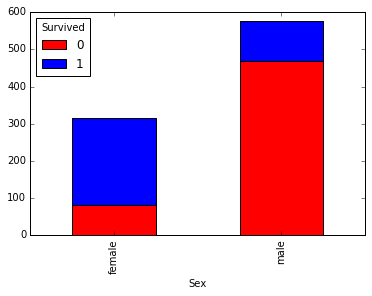

In [6]:
# Frist assumpution: Female survived, male not
survived_by_sex = pd.crosstab(train_data.Sex, train_data.Survived, margins=False)
print(survived_by_sex)
survived_by_sex.plot(kind = "bar", stacked = True, color = ["red", "blue"])
survived_by_sex.apply(lambda r: r/r.sum(), axis=1)

# TODO why [boolean array] return rows

'\nFrom here, we can tell that female in Pclass 3 has much lower chance to survive, we should dive deep into this subset\n\nAnd also, male in Pclass 1 has large chance to survive.\n'

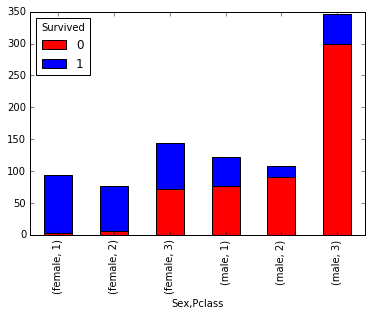

In [7]:
survived_by_sex_and_Pclass = pd.crosstab([train_data.Sex, train_data.Pclass], train_data.Survived, margins=False)
survived_by_sex_and_Pclass.plot(kind="bar", stacked = True, color = ["red", "blue"])
survived_by_sex_and_Pclass.apply(lambda x: x / x.sum(), axis=1)

"""
From here, we can tell that female in Pclass 3 has much lower chance to survive, we should dive deep into this subset

And also, male in Pclass 1 has large chance to survive.
"""

Survived        0    1
Sex    SibSp          
female 0       37  137
       1       26   80
       2        3   10
       3        7    4
       4        4    2
       5        1    0
       8        3    0
male   0      361   73
       1       71   32
       2       12    3
       3        5    0
       4       11    1
       5        4    0
       8        4    0


Survived             0         1
Sex    SibSp                    
female 0      0.212644  0.787356
       1      0.245283  0.754717
       2      0.230769  0.769231
       3      0.636364  0.363636
       4      0.666667  0.333333
       5      1.000000  0.000000
       8      1.000000  0.000000
male   0      0.831797  0.168203
       1      0.689320  0.310680
       2      0.800000  0.200000
       3      1.000000  0.000000
       4      0.916667  0.083333
       5      1.000000  0.000000
       8      1.000000  0.000000

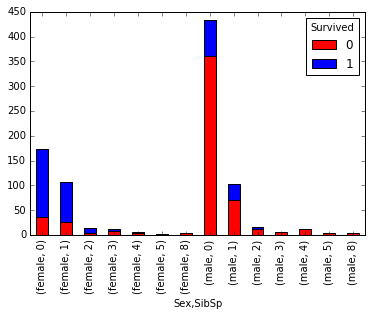

In [8]:
# train_data.boxplot(column="Fare", by="Sex")
# ax1 = plt.subplot(3,1,1)
# ax1.set_title = "Class 1"
# train_data.loc[(train_data.Pclass == 1) & train_data.Survived == 1]["Fare"].hist(bins = 20, color = "red", ax = ax1)
# plt.subplot(3,1,2)
# train_data.loc[train_data.Pclass == 2]["Fare"].hist(bins = 20)
# plt.subplot(3,1,3)
# train_data.loc[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Survived == 1)]["Fare"].hist(bins = 20, color = "blue")
# train_data.loc[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Survived == 0)]["Fare"].hist(bins = 20, color = "red")
survived_by_relatives = pd.crosstab([train_data.Sex, train_data.SibSp], train_data.Survived, margins=False)
plt.figure(figsize=(15,10))
survived_by_relatives.plot(kind="bar", stacked = True, color=["red", "blue"])
print(survived_by_relatives)

survived_by_relatives.apply(lambda x : x/x.sum(), axis = 1)

In [9]:
survived_by_Parch = pd.crosstab([train_data.Sex, train_data.Parch], train_data.Survived, margins=False)
print(survived_by_Parch)
survived_by_Parch.apply(lambda x : x/x.sum(), axis= 1)

Survived        0    1
Sex    Parch          
female 0       41  153
       1       14   46
       2       19   30
       3        1    3
       4        2    0
       5        3    1
       6        1    0
male   0      404   80
       1       39   19
       2       21   10
       3        1    0
       4        2    0
       5        1    0


Survived             0         1
Sex    Parch                    
female 0      0.211340  0.788660
       1      0.233333  0.766667
       2      0.387755  0.612245
       3      0.250000  0.750000
       4      1.000000  0.000000
       5      0.750000  0.250000
       6      1.000000  0.000000
male   0      0.834711  0.165289
       1      0.672414  0.327586
       2      0.677419  0.322581
       3      1.000000  0.000000
       4      1.000000  0.000000
       5      1.000000  0.000000

In [10]:
# bin the Fare into 4 classes

bins = [0, 10,20,30, 1000]
group_names = [1, 2, 3, 4]
train_data["Fare_class"] = pd.cut(train_data['Fare'], bins, labels=group_names)


sex_Pclass_Fareclass = pd.crosstab([train_data.Sex,train_data.Pclass,train_data.Fare_class], train_data.Survived)
sex_Pclass_Fareclass.apply(lambda x: x/x.sum(), axis=1)

Survived                         0         1
Sex    Pclass Fare_class                    
female 1      1                NaN       NaN
              2                NaN       NaN
              3           0.142857  0.857143
              4           0.022989  0.977011
       2      1                NaN       NaN
              2           0.085714  0.914286
              3           0.096774  0.903226
              4           0.000000  1.000000
       3      1           0.406250  0.593750
              2           0.418605  0.581395
              3           0.666667  0.333333
              4           0.875000  0.125000
male   1      1           1.000000  0.000000
              2                NaN       NaN
              3           0.558824  0.441176
              4           0.634146  0.365854
       2      1                NaN       NaN
              2           0.841270  0.158730
              3           0.840000  0.160000
              4           0.785714  0.214286
       3      1           0.890625  0.109375
              2           0.763158  0.236842
              3           0.875000  0.125000
              4           0.760000  0.240000

In [11]:
import re


def build_title(data, column = "Name"):
#     return data[column].apply(lambda x: re.findall(r"[\w']+", x)[1].strip())
    name_seires = pd.DataFrame([str.split(str.split(name,',')[1],'.')[0].strip() for name in data['Name']])
    name_seires[name_seires.isin(["Col", "Don", "Major","Capt"])] = "Boss"
    
    return name_seires

combi_df = train_data.append(test_data, ignore_index=True)
train_data["Name"].apply(lambda x : re.findall(r"[\w']+", x)[1]).value_counts()

combi_df["Title"] = combi_df["Name"].apply(lambda x: re.findall(r"[\w']+", x)[1].strip())
# print(combi_df["Title"].value_counts())
combi_df.ix[combi_df.Title.isin(["Col", "Don", "Major","Capt"]), "Title"] = "Boss"
combi_df.ix[combi_df.Title.isin(["Dona", "Jonkheer", "Lady", "the Countess", "Ms"]), "Title"] = "Lady"

combi_df.ix[~combi_df.Title.isin(["Mr","Dr","Miss", "Mrs", "Boss","Master", "Sir", "Lady"]), "Title"] = "None"

# print(combi_df["Title"].value_counts())

train_data["Title"] = combi_df["Title"][0:train_data.shape[0]]
test_data["Title"] = combi_df["Title"][train_data.shape[0]:].reset_index(drop=True)

train_data["Title_1"] = build_title(train_data)

print(train_data["Title"].value_counts())
train_data["Title_1"].value_counts()
# print(test_data["Embarked"])

Mr        497
Miss      176
Mrs       120
None       46
Master     39
Dr          6
Boss        5
Lady        2
Name: Title, dtype: int64


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Boss              6
Rev               6
Mlle              2
Jonkheer          1
Ms                1
Lady              1
Mme               1
the Countess      1
Sir               1
Name: Title_1, dtype: int64

In [12]:
# Data mungging, convert all string to integer, since sklearn only accept integer value.
test_data["Fare"].fillna(train_data["Fare"].mean(), inplace=True)
train_data["Embarked"].fillna("Q", inplace= True )

# train_data["Embarked_Int"] = train_data["Embarked"].map({"S": 1, "C":2, "Q":3})
# test_data["Embarked_Int"] = test_data["Embarked"].map({"S": 1, "C":2, "Q":3})


# train_data["Title_Int"] = train_data["Title"].map({"Mr": 1, "Miss":2, "Mrs":3, "None" :4, "Master":5, "Sir":6, "Mlle":7, "Lady":8})
# test_data["Title_Int"] = test_data["Title"].map({"Mr": 1, "Miss":2, "Mrs":3, "None" :4, "Master":5, "Sir":6, "Mlle":7, "Lady":8})

In [13]:
# Hypothesis One: Woman and Children under age 12 Survived, not man
# train_data[(train_data.Age < 12)]["Survived"].value_counts()

train_data[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Fare > 20)]["Survived"].value_counts()

0    28
1     9
Name: Survived, dtype: int64

In [14]:
train_data[(train_data.Age < 13.5) & (train_data.Sex == "male") & (train_data.Fare <= 26.2687)]["Survived"].value_counts()

1    13
0     2
Name: Survived, dtype: int64

In [15]:
def write_to_csv(results_df, filename):
    headers = ["PassengerId", "Survived"]
    results_df[headers].to_csv(filename, header=headers, index = False)

In [16]:
# print(test_data["Survived"].value_counts())
test_data.loc[(test_data.Sex == "female") & (test_data.Pclass == 3) & (test_data.Fare > 20), "Survived"] = 0
print(test_data["Survived"].value_counts())

write_to_csv(test_data, "women_except_class3.csv")

# Assume children younger than 6 survive harm the results, so this assumption failed
test_data.loc[test_data.Age < 6, "Survived"] = 1
print(test_data["Survived"].value_counts())

write_to_csv(test_data, "women_except_class3_and_children.csv")

0.0    11
Name: Survived, dtype: int64
1.0    12
0.0     9
Name: Survived, dtype: int64


In [17]:
from sklearn.metrics import accuracy_score
from sklearn import tree, cross_validation
from sklearn.ensemble import RandomForestClassifier
import pydot
from sklearn.externals.six import StringIO

training_labels = train_data["Survived"].apply(lambda x :1 if x else 0)

# baseline for training data
baseline_labels = (train_data.Sex == "female").apply(lambda x : 1 if x else 0)
baseline_score = accuracy_score(training_labels, baseline_labels)
print(baseline_score)

train_data["Gender"] = train_data["Sex"].map({"male":0, "female": 1})
train_data.Age.fillna(train_data.Age.mean(), inplace=True)

test_data["Gender"] = test_data["Sex"].map({"male":0, "female": 1})
test_data.Age.fillna(test_data.Age.mean(), inplace=True)


training_column = ["Gender", "Pclass", "Fare", "Age"]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion="entropy")
# clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(train_data[training_column], training_labels)
print(clf)


predict_labels = clf.predict(train_data[training_column])
train_score = accuracy_score(predict_labels, training_labels)
print(train_score)


cv_scores = cross_validation.cross_val_score(clf, train_data[training_column], training_labels, cv=5)
print(cv_scores.mean())

# predict_labels = clf.predict(test_data[training_column])
# append_test_df["Survived"] = pd.Series(predict_labels)
# write_to_csv(append_test_df, "sex_fare_pclass_dt_3.csv")
"""
This give us the 0.78469 on public leading board, the best at the moment.
"""

0.786756453423
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.822671156004
0.80808259631


'\nThis give us the 0.78469 on public leading board, the best at the moment.\n'

In [18]:
def one_hot_dataframe(data, column_name):
    dummies_data = pd.get_dummies(data[column_name])
    dummies_data.index = data.index
    dummies_data.columns = ["{}_{}".format(column_name, idx) for idx in dummies_data.columns]
    
    return dummies_data

In [19]:
# add family number and embarked as feature.
train_data["FamilyNo"] = train_data["SibSp"] + train_data["Parch"]
test_data["FamilyNo"] = test_data["SibSp"] + test_data["SibSp"]

train_data = pd.concat([train_data, one_hot_dataframe(train_data, "Embarked")], axis=1)
test_data =  pd.concat([test_data, one_hot_dataframe(test_data, "Embarked")], axis=1)

train_data = pd.concat([train_data, one_hot_dataframe(train_data, "Title")], axis=1)
test_data =  pd.concat([test_data, one_hot_dataframe(test_data, "Title")], axis=1)

train_data = pd.concat([train_data, one_hot_dataframe(train_data, "Pclass")], axis=1)
test_data =  pd.concat([test_data, one_hot_dataframe(test_data, "Pclass")], axis=1)

In [28]:
# test_data.info()
from sklearn.linear_model import LogisticRegression
feature_columns = ["Gender","Pclass", "Fare", "Age"]
# feature_columns = ["Gender","Pclass_1", "Pclass_2", "Fare", "Age", "Title_Master", "Embarked_S", "Embarked_C", "FamilyNo"]
# feature_columns = ["Gender","Title_Mr","Title_Mrs","Title_None","Title_Sir","Title_Miss","Title_Master", "Title_Lady", "Pclass_1", "Pclass_2", "Pclass_3", "Fare", "Age", "FamilyNo", "Embarked_S", "Embarked_C","Embarked_Q"]

# clf = LogisticRegression(C=1e5)
clf = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, criterion="entropy")
clf = clf.fit(train_data[feature_columns], training_labels)
print(clf)


predict_labels = clf.predict(train_data[feature_columns])
train_score = accuracy_score(predict_labels, training_labels)
print(train_score)


cv_scores = cross_validation.cross_val_score(clf, train_data[feature_columns], training_labels, cv=5)
print(cv_scores.mean())
print(cv_scores.var())

predict_labels = clf.predict(test_data[feature_columns])
test_data["Survived"] = pd.Series(predict_labels)
write_to_csv(test_data, "sex_fare_pclass_family_dt.csv")


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.850729517396
0.818213857997
0.00028519859211


In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV

param_grid = {'max_depth': np.arange(3, 15), "min_samples_leaf": np.arange(5, 20), "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)

grid_search.fit(train_data[feature_columns], training_labels)
# tree_preds = tree.predict_proba(xtest)[:, 1]
# tree_performance = roc_auc_score(ytest, tree_preds)
print(max(grid_search.grid_scores_))

TypeError: unorderable types: dict() > dict()

In [ ]:
from sklearn.feature_extraction import DictVectorizer


# normalize the integer feature
train_data["normalized_fare"] = train_data["Fare"]/train_data["Fare"].max().astype(np.float64)
train_data["normalized_age"] = train_data["Age"]/train_data["Age"].max().astype(np.float64)

test_data["normalized_fare"] = test_data["Fare"]/test_data["Fare"].max().astype(np.float64)
test_data["normalized_age"] = test_data["Age"]/test_data["Age"].max().astype(np.float64)
# print(train_data.head())

train_data["FamilyNo"] = train_data["SibSp"] + train_data["Parch"]
test_data["FamilyNo"] = test_data["SibSp"] + test_data["Parch"]


# SVM classifier was overfitting
from sklearn import svm
clf = svm.SVC(C= 100, kernel="linear")
print(clf)
from sklearn import cross_validation


# one-hot-encoder for Pclass feature
train_Pclass = one_hot_dataframe(train_data, "Pclass")
# train_data = train_data.join(train_Pclass)

test_Pclass = one_hot_dataframe(test_data, "Pclass")
# test_data = test_data.join(test_Pclass)

training_column = ["Gender","Pclass_3", "Pclass_1", "Pclass_2", "normalized_fare", "normalized_age" , "FamilyNo"]
scores = cross_validation.cross_val_score(clf, train_data[training_column], training_labels, cv=5)
print(scores.mean())

clf.fit(train_data[training_column], training_labels)

predict_labels = clf.predict(train_data[training_column])
train_score = accuracy_score(predict_labels, training_labels)
print(train_score)

predict_labels = clf.predict(test_data[training_column])
append_test_df["Survived"] = pd.Series(predict_labels)
write_to_csv(append_test_df, "sex_fare_pclass_svm_linear.csv")